In [1]:
import numpy as np
from scipy.integrate import trapezoid
from compute_work_isothermal import compute_work_isothermal

# 1-1-1 Checking point 1) Write a Python function named compute_work_isothermal.py to compute the work
# 1-1-1 Checking point 2) Use scipy.integrate.trapezoid to compute the work. The pressure in this case is given by the ideal gas law (the code is saved in the compute_work_isothermal.py file)
# checking the validity of compute_work_isothermal
V_i = 0.1  # m^3
V_f = 0.3  # m^3
n = 1      # mol
R = 8.314  # J/mol-K
T = 300    # K

work_isothermal = compute_work_isothermal(V_i, V_f, n, R, T)
print(f"Work done in isothermal process: {work_isothermal} J")


Work done in isothermal process: -2740.1595108981555 J


In [5]:
from compute_work_adiabatic import compute_work_adiabatic
# 1-1-2 Checking point 1) Write a Python function named compute_work_adiabatic.py to compute the work
# 1-1-2 Checking point 2) Compute the constant from the initial conditions and perform numerical integration to find the work

# checking the validity of compute_work_adiabatic
# Parameters
n = 1      # mol
R = 8.314  # J/mol-K
P_i = (n * R * T) / V_i  # From ideal gas law
V_i = 0.1  # m^3
V_f = 0.3  # m^3
gamma = 1.4   # Adiabatic index

# Compute the constant for the adiabatic process
C = P_i * V_i**gamma

work_adiabatic = compute_work_adiabatic(V_i, V_f, P_i, gamma)
print(f"The constant from the initial conditions: {C} J")
print(f"Work done in adiabatic process: {work_adiabatic} J")


The constant from the initial conditions: 992.9589047945329 J
Work done in adiabatic process: -2217.3822023944267 J


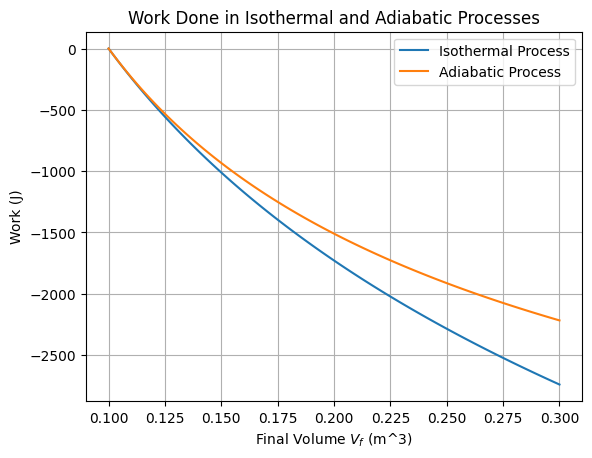

In [6]:
import matplotlib.pyplot as plt
from compute_work_adiabatic import compute_work_adiabatic
from compute_work_isothermal import compute_work_isothermal

# 1-1-3 Checking point 1) Plot the work done in both processes as a function of the final volume Vf for values of Vf between Vi and 3Vi
# 1-1-3 Checking point 2) Assume the following parameters for the ideal gas

# # Given parameters
# n = 1      # mol
# R = 8.314  # J/mol-K
# T = 300    # K
# V_i = 0.1  # m^3
# gamma = 1.4
# P_i = (n * R * T) / V_i  # From ideal gas law

# # Define the range of final volumes
# V_f_values = np.linspace(V_i, 3 * V_i, 100)

# Compute work for each final volume
work_isothermal = [compute_work_isothermal(V_i, V_f, n, R, T) for V_f in V_f_values]
work_adiabatic = [compute_work_adiabatic(V_i, V_f, P_i, gamma) for V_f in V_f_values]

# Plotting
plt.plot(V_f_values, work_isothermal, label='Isothermal Process')
plt.plot(V_f_values, work_adiabatic, label='Adiabatic Process')

plt.xlabel('Final Volume $V_f$ (m^3)')
plt.ylabel('Work (J)')
plt.title('Work Done in Isothermal and Adiabatic Processes')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
import csv
import os

# Initialize empty lists to store the computed work
work_isothermal = []
work_adiabatic = []

# Compute work for each final volume for both processes
for V_f in V_f_values:
    w_iso = compute_work_isothermal(V_i, V_f, n, R, T)
    w_adi = compute_work_adiabatic(V_i, V_f, P_i, gamma)
    
    # Append the computed work values to the lists
    work_isothermal.append(w_iso)
    work_adiabatic.append(w_adi)

# Get the current working directory
current_directory = os.getcwd()

# Specify the folder where the file will be saved, relative to the current directory
folder_name = "comp-prob-solv/homework-4-1"
directory = os.path.join(current_directory, folder_name)

# Create the directory if it does not exist
os.makedirs(directory, exist_ok=True)

# Specify the CSV file path
csv_file_path = os.path.join(directory, "work_vs_volume.csv")

# Write the results to a CSV file
with open(csv_file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    # Write header
    writer.writerow(['Final Volume (m^3)', 'Work Isothermal (J)', 'Work Adiabatic (J)'])
    
    # Write data rows
    for V_f, w_iso, w_adi in zip(V_f_values, work_isothermal, work_adiabatic):
        writer.writerow([V_f, w_iso, w_adi])

print(f"CSV file successfully created at {csv_file_path}")

CSV file successfully created at c:\Users\khh38\Desktop\PhD\Class\comp-prob-solv\comp-prob-solv/homework-4-1\work_vs_volume.csv
